# **DATA VISUALISATION**

# Importing Packages

In [2]:
!mamba install openpyxl==3.0.9 -y
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

/bin/bash: mamba: command not found


# Reading data

In [3]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


# Data Cleaning


In [4]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

In [5]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [6]:
df_can['Total'] = df_can.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [7]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [8]:
df_can.set_index('Country', inplace=True)

In [9]:
df_can.columns = list(map(str, df_can.columns))
years = list(map(str, range(1980, 2014)))

# LINE PLOT

In [10]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
print('Matplotlib version: ', mpl.__version__)  # >= 2.0.0
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

Matplotlib version:  3.2.2
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


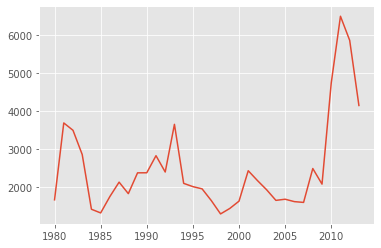

In [11]:
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.plot()

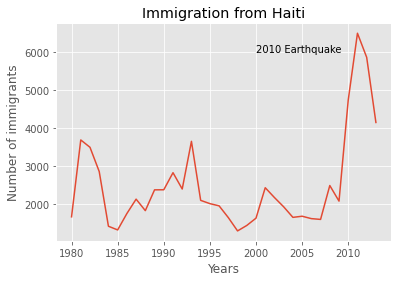

In [12]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() # need this line to show the updates made to the figure

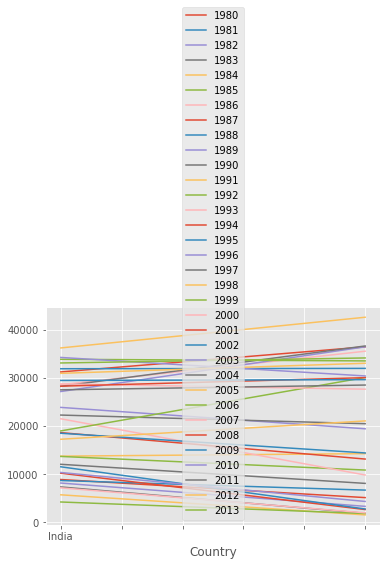

In [13]:
df_CI = df_can.loc[['India', 'China'] , years]
df_CI.plot(kind='line')

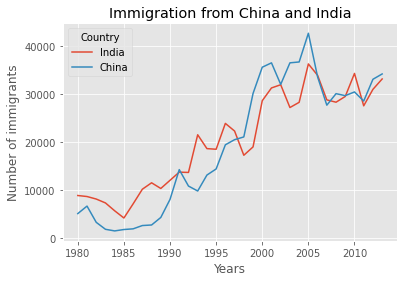

In [14]:
df_CI = df_CI.transpose()
df_CI.index = df_CI.index.map(str)
df_CI.plot( kind = 'line')

plt.title('Immigration from China and India')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

plt.show()

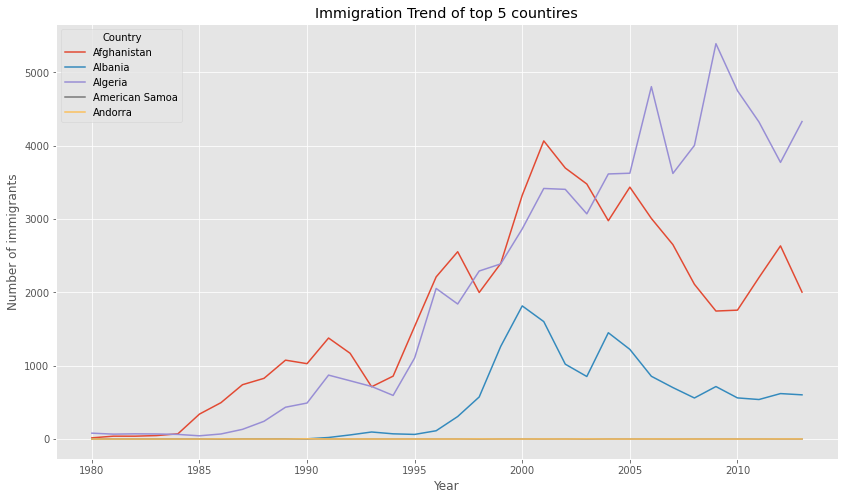

In [15]:
# Prepare the data
df_top5 = df_can.iloc[0:5,3:37]
df_top5 = df_top5.transpose()

# Plot
# Change the index to integer
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind = 'line', figsize=(14,8))

# add the title and label the axes
plt.title('Immigration Trend of top 5 countires')
plt.xlabel('Year')
plt.ylabel('Number of immigrants')

plt.show()



# AREA PLOT

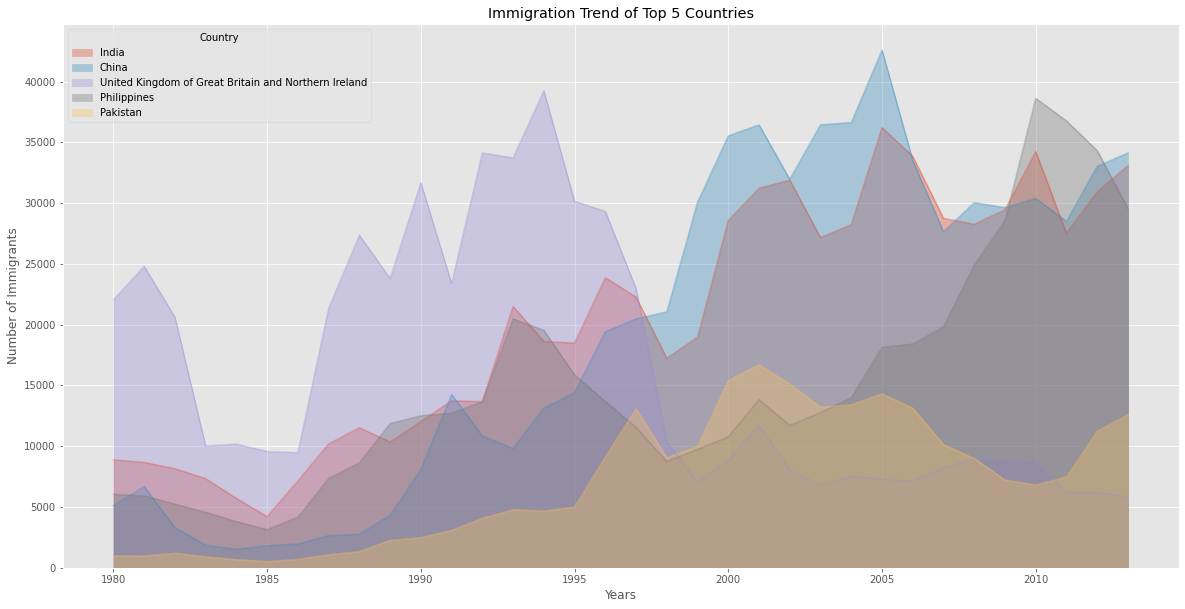

In [22]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df_can.head()
df_top5 = df_top5[years].transpose() 

df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area', 
             alpha=0.35,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

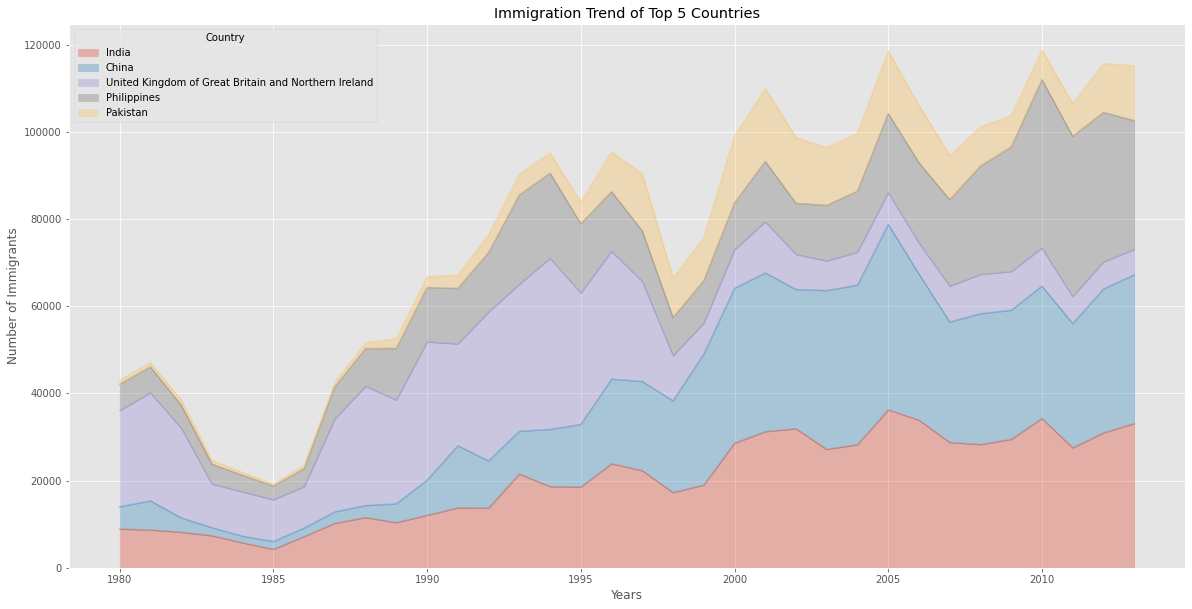

In [23]:
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

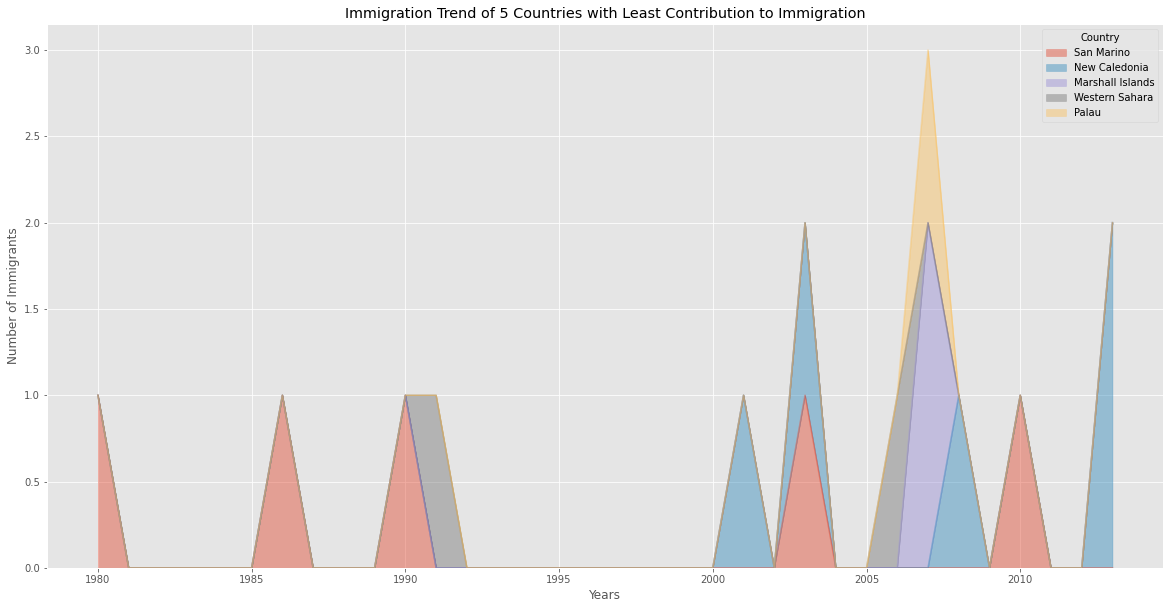

In [24]:
df_least5 = df_can.tail(5)

# transpose the dataframe
df_least5 = df_least5[years].transpose() 
df_least5.head()

df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# HISTOGRAMS



In [26]:
df_can['2013'].head()
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


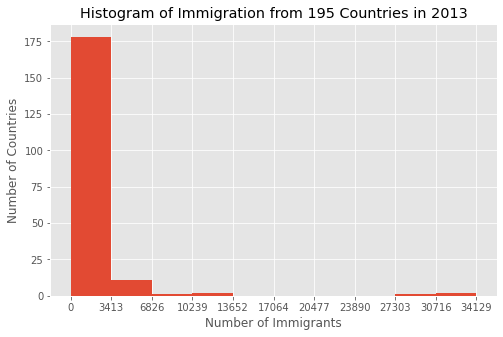

In [28]:
df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

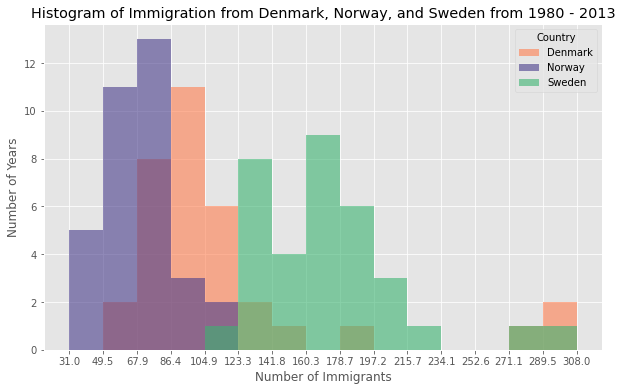

In [35]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()
count, bin_edges = np.histogram(df_t, 15)
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

If we do not want the plots to overlap each other, we can stack them using the stacked parameter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the xlim paramater, as show below.

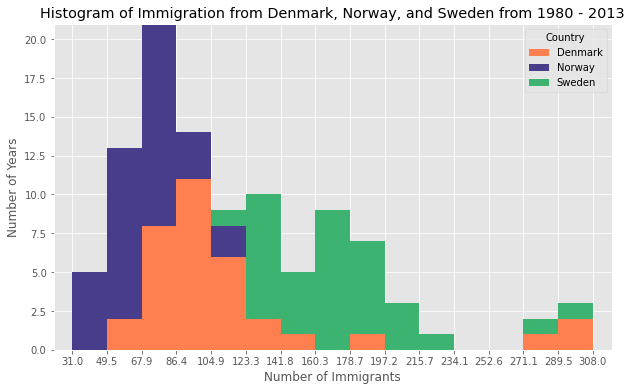

In [36]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

# Bar Charts

In [37]:
df_iceland = df_can.loc['Iceland', years]

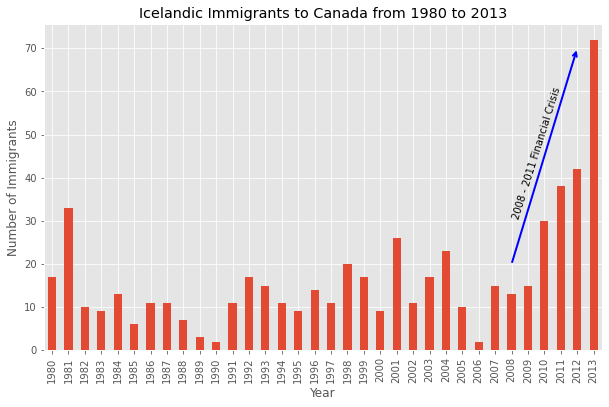

In [41]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

In [42]:
df_can.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

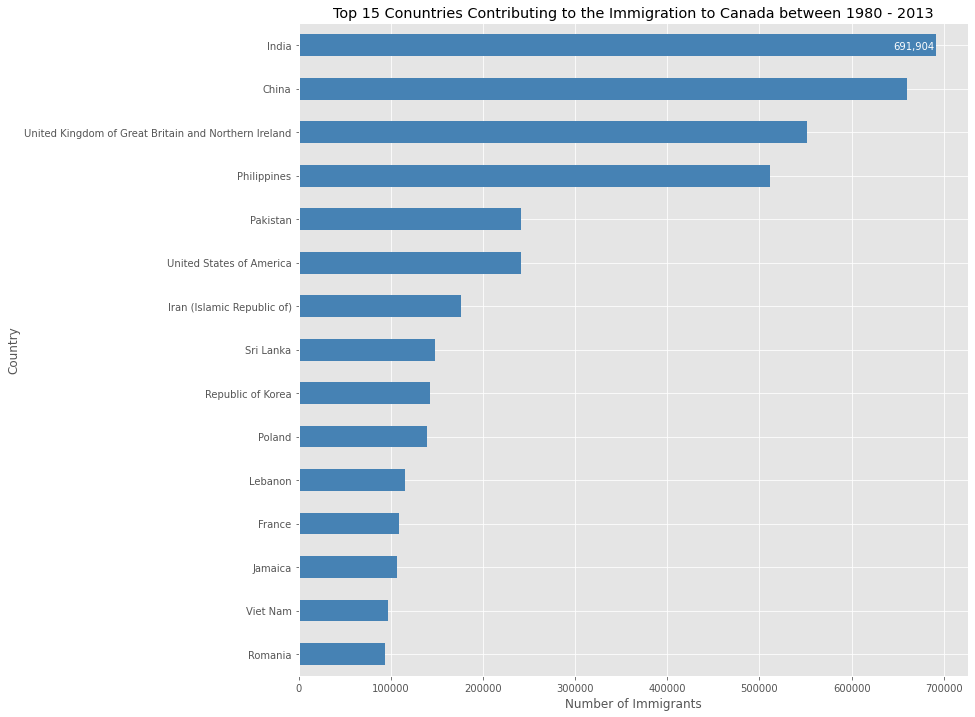

In [43]:
### type your answer here
# generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas

# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

# Pie Charts

In [44]:
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


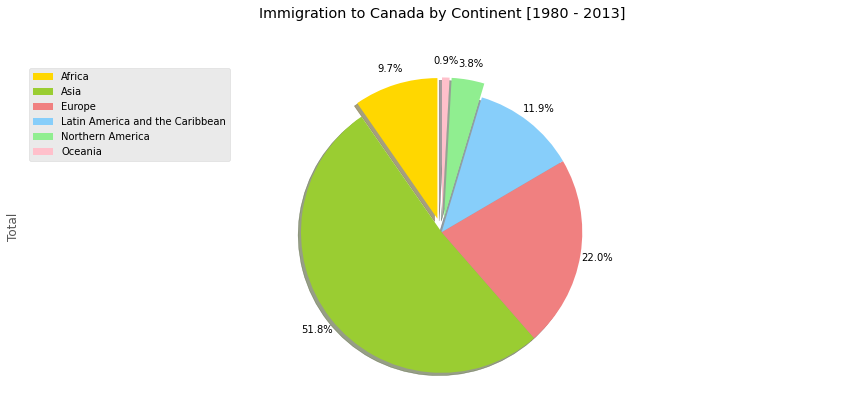

In [50]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',   # add in percentages
                            startangle=90,      # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

# Box Plots

In [52]:
df_japan = df_can.loc[['Japan'], years].transpose()

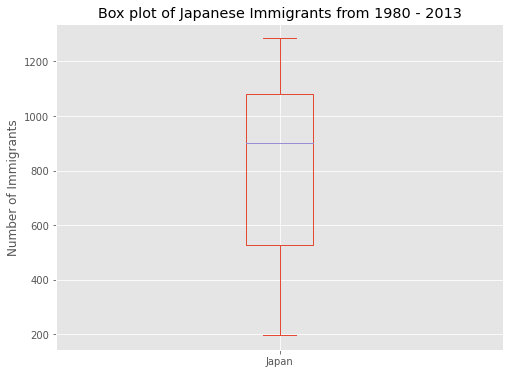

In [53]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [55]:
df_CI = df_can.loc[['India', 'China'] , years].transpose()

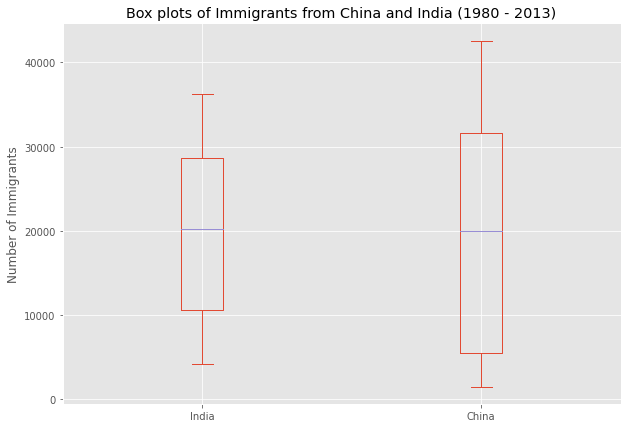

In [57]:
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

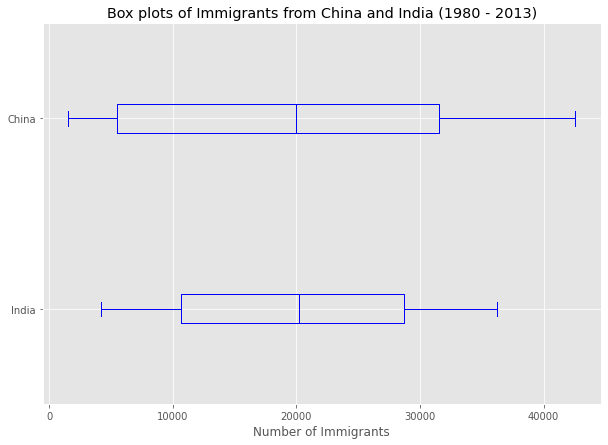

In [58]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

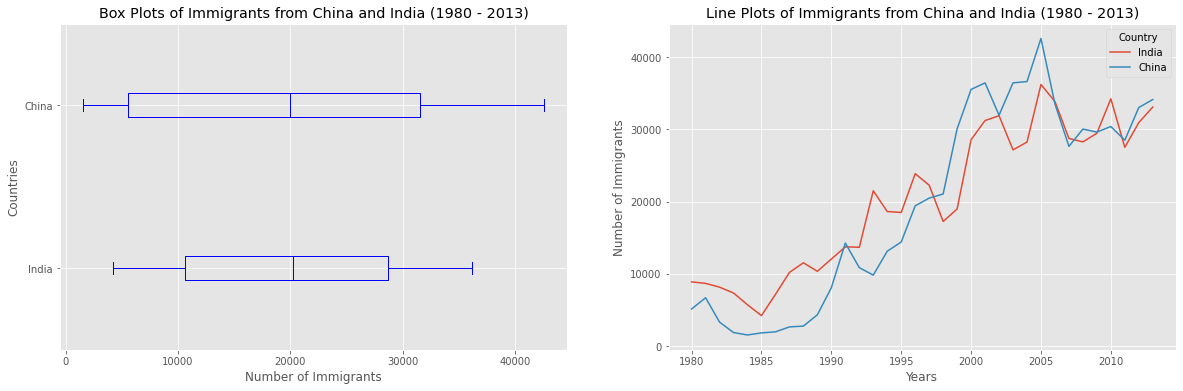

In [68]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [67]:
 df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)

In [72]:
   #The correct answer is:

    # create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

    # slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

    # merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

    # display dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


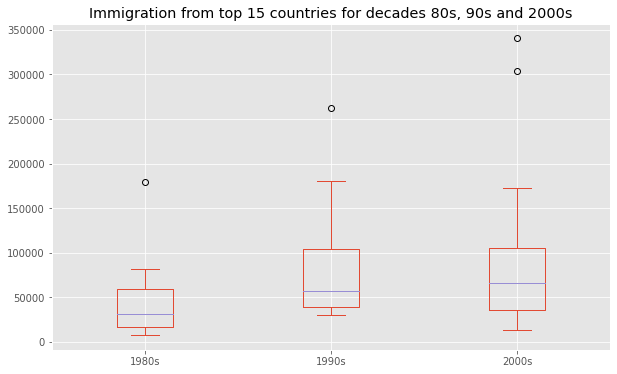

In [73]:
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

In [74]:
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


# Scatter Plots

In [75]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


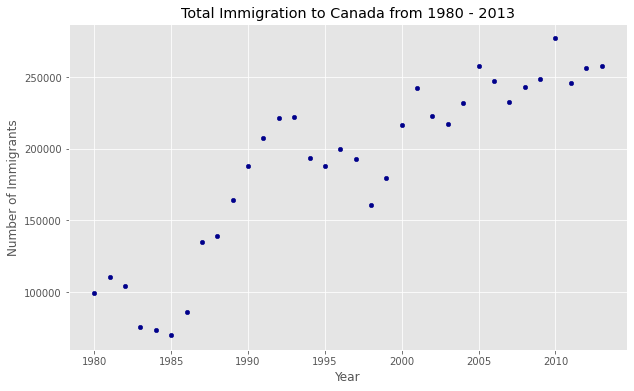

In [76]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [77]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

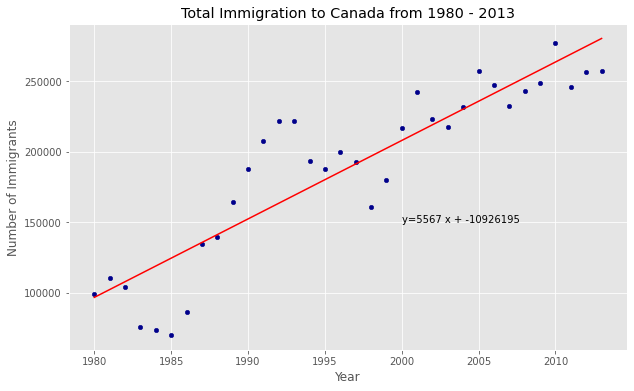

'No. Immigrants = 5567 * Year + -10926195'

In [78]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [79]:
    #The correct answer is:  

    # create df_countries dataframe
    df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

    # create df_total by summing across three countries for each year
    df_total = pd.DataFrame(df_countries.sum(axis=1))

    # reset index in place
    df_total.reset_index(inplace=True)

    # rename columns
    df_total.columns = ['year', 'total']

    # change column year from string to int to create scatter plot
    df_total['year'] = df_total['year'].astype(int)

    # show resulting dataframe
    df_total.head()


,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


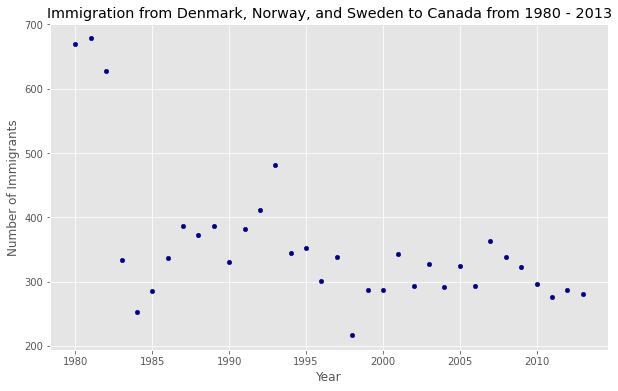

In [80]:
    #The correct answer is:  

    # generate scatter plot
    df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

    # add title and label to axes
    plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
    plt.xlabel('Year')
    plt.ylabel('Number of Immigrants')

    # show plot
    plt.show()

# Bubble Plots

In [81]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


In [82]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

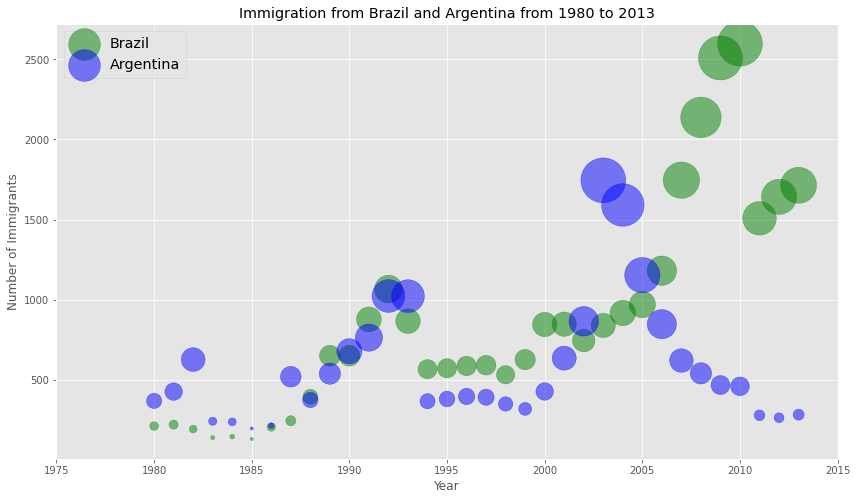

In [83]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [84]:
    #The correct answer is:  

    # normalized Chinese data
    norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
    # normalized Indian data
    norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

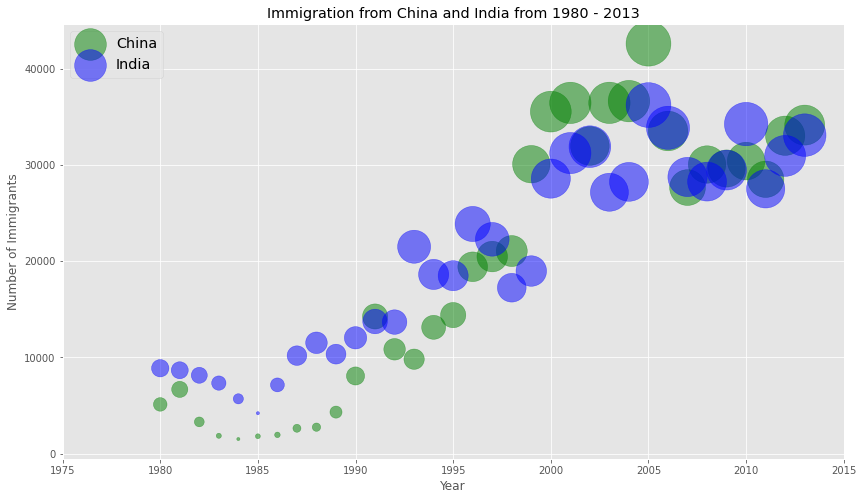

In [85]:
    #The correct answer is:  

    # China
    ax0 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='China',
                        figsize=(14, 8),
                        alpha=0.5,                  # transparency
                        color='green',
                        s=norm_china * 2000 + 10,  # pass in weights 
                        xlim=(1975, 2015)
                       )

    # India
    ax1 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='India',
                        alpha=0.5,
                        color="blue",
                        s=norm_india * 2000 + 10,
                        ax = ax0
                       )

    ax0.set_ylabel('Number of Immigrants')
    ax0.set_title('Immigration from China and India from 1980 - 2013')
    ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')
